## Análise de Dados sobre as Notificações de Síndrome Gripal no Estado de São Paulo

In [1]:
import pandas as pd
import matplotlib as mpl
low_memory=False
%matplotlib inline
pd.options.display.max_columns = 80
pd.options.display.max_rows = 90

In [2]:
filename = r'C:\Users\Jonny\Downloads\dados-sp.csv'
df = pd.read_csv(filename, delimiter=';', 
                 encoding='ISO-8859-1',
                 error_bad_lines=False)

b'Skipping line 38541: expected 33 fields, saw 34\n'
b'Skipping line 58237: expected 33 fields, saw 34\n'
b'Skipping line 65797: expected 33 fields, saw 34\n'
b'Skipping line 82771: expected 33 fields, saw 34\nSkipping line 82796: expected 33 fields, saw 34\n'
b'Skipping line 101479: expected 33 fields, saw 34\n'
b'Skipping line 313272: expected 33 fields, saw 34\nSkipping line 327307: expected 33 fields, saw 34\nSkipping line 327371: expected 33 fields, saw 34\n'
b'Skipping line 347977: expected 33 fields, saw 36\n'
b'Skipping line 371767: expected 33 fields, saw 34\n'
b'Skipping line 401243: expected 33 fields, saw 34\n'
b'Skipping line 582679: expected 33 fields, saw 34\n'
b'Skipping line 591091: expected 33 fields, saw 34\n'
b'Skipping line 606993: expected 33 fields, saw 34\nSkipping line 616600: expected 33 fields, saw 34\n'
b'Skipping line 741599: expected 33 fields, saw 34\n'
b'Skipping line 830175: expected 33 fields, saw 34\n'
b'Skipping line 918131: expected 33 fields, saw 3

In [3]:
df.sample(10)

,ÿid,dataNotificacao,dataInicioSintomas,dataNascimento,sintomas,profissionalSaude,cbo,condicoes,estadoTeste,dataTeste,tipoTeste,resultadoTeste,paisOrigem,sexo,bairro,estado,estadoIBGE,municipio,municipioIBGE,cep,origem,cnes,estadoNotificacao,estadoNotificacaoIBGE,municipioNotificacao,municipioNotificacaoIBGE,numeroNotificacao,excluido,validado,idade,dataEncerramento,evolucaoCaso,classificacaoFinal
264574,NUMkNanGHY,2020-05-29T14:51:30.625Z,2020-05-27T03:00:00.000Z,1987-07-29T03:00:00.000Z,"Febre, Tosse",Sim,225 - Médico,NaN,Coletado,2020-05-28T03:00:00.000Z,NaN,NaN,undefined,Feminino,CENTRO,SÃO PAULO,35,Ribeirão Preto,3543402,14015,undefined,7965192,São Paulo,35,Ribeirão Preto,3543402,352002240079,undefined,undefined,32,NaN,NaN,NaN
1117264,Hpl0GDNFzV,2020-06-28T22:48:07.846Z,undefined,1979-12-01T00:00:00.000Z,Outros: Paciente assintomático,NaN,NaN,NaN,Concluído,2020-05-21T00:00:00.000Z,TESTE RÁPIDO - ANTICORPO,Negativo,undefined,Masculino,Ferrazópolis,SÃO PAULO,35,São Bernardo do Campo,3548708,09781,undefined,9225323,Paraná,41,Curitiba,4106902,412006849005,undefined,undefined,40,NaN,NaN,NaN
836350,xTYrZ7MS8t,2020-06-20T03:00:00.000Z,2020-06-12T03:00:00.000Z,1998-03-27T03:00:00.000Z,Outros,Sim,3222 - Técnico ou Auxiliar em Enfermagem,NaN,Concluído,2020-06-20T03:00:00.000Z,RT-PCR,Negativo,undefined,Feminino,DT INDUSTRIAL,SÃO PAULO,35,Jardinópolis,3525102,14680,undefined,2080400,São Paulo,35,Ribeirão Preto,3543402,352005602986,undefined,undefined,22,NaN,NaN,NaN
626150,fE9L9kzZX3,2020-06-03T03:00:00.000Z,2020-06-01T03:00:00.000Z,1966-11-16T02:00:00.000Z,"Dispneia, Febre, Outros",Não,NaN,NaN,Concluído,2020-06-05T03:00:00.000Z,RT-PCR,Positivo,undefined,Masculino,PQ LIGIA,SÃO PAULO,35,São Paulo,3550308,5857,undefined,6218830,São Paulo,35,São Paulo,3550308,352002461438,undefined,undefined,53,NaN,NaN,Confirmado Laboratorial
59962,fZp2FTGZfH,2020-04-23T03:00:00.000Z,2020-04-22T03:00:00.000Z,1985-11-26T02:00:00.000Z,"Tosse, Febre",Não,NaN,NaN,NaN,NaN,NaN,NaN,undefined,Masculino,JD MONTE KEMEL,SÃO PAULO,35,São Paulo,3550308,05634,undefined,204288832000001,São Paulo,35,São Paulo,3550308,352000390770,undefined,undefined,34,NaN,NaN,NaN
527685,fYXaJGfzSx,2020-06-12T18:13:47.681Z,2020-06-08T03:00:00.000Z,1986-04-30T03:00:00.000Z,"Outros, Dor de Garganta",Sim,3222 - Técnico ou Auxiliar em Enfermagem,NaN,Coletado,2020-06-12T03:00:00.000Z,NaN,NaN,undefined,Feminino,BQ DOS EUCALIPTOS,SÃO PAULO,35,São José dos Campos,3549904,12232,undefined,0009628,São Paulo,35,São José dos Campos,3549904,352003709468,undefined,undefined,34,NaN,NaN,NaN
257570,hhZH6IrouX,2020-05-31T03:00:00.000Z,2020-05-28T03:00:00.000Z,1979-11-08T02:00:00.000Z,"Febre, Tosse",Não,NaN,NaN,Concluído,2020-05-28T03:00:00.000Z,RT-PCR,Positivo,undefined,Masculino,Jardim Paraiso,SÃO PAULO,35,Piracicaba,3538709,13401,undefined,3368009,São Paulo,35,Piracicaba,3538709,352002378842,undefined,undefined,40,2020-05-31T03:00:00.000Z,Em tratamento domiciliar,Confirmado Laboratorial
1125197,V4tH4j6U24,2020-06-26T15:00:24.993Z,2020-06-24T03:00:00.000Z,1992-09-08T03:00:00.000Z,"Febre, Tosse, Outros",Não,NaN,NaN,Solicitado,NaN,NaN,NaN,undefined,Masculino,VILA SANTA MARGARIDA,SÃO PAULO,35,Ferraz de Vasconcelos,3515707,08543,undefined,undefined,São Paulo,35,Ferraz de Vasconcelos,3515707,352006453791,undefined,undefined,27,NaN,NaN,NaN
234367,QBQIBN1wGU,2020-05-27T10:43:20.515Z,2020-05-12T03:00:00.000Z,2000-10-17T02:00:00.000Z,Outros,Não,NaN,NaN,Concluído,2020-05-12T03:00:00.000Z,RT-PCR,Positivo,undefined,Masculino,JARDIM SÃO BENEDITO,SÃO PAULO,35,São Paulo,3550308,04813,undefined,2815575,São Paulo,35,São Paulo,3550308,352001870054,undefined,undefined,19,2020-05-27T03:00:00.000Z,Cura,Confirmado Laboratorial
305482,F7EYm63nLu,2020-06-01T19:01:18.970Z,2020-05-24T03:00:00.000Z,1956-04-20T03:00:00.000Z,"Tosse, Outros",Não,NaN,Diabetes,Concluído,2020-06-01T03:00:00.000Z,TESTE RÁPIDO - ANTICORPO,Positivo,undefined,Feminino,VILA MISSIONARIA,SÃO PAULO,35,São Paulo,3550308,04458,undefined,2789078,São Paulo,35,São P

In [4]:
for k in (16,18,19,23,25,26): print (k, df.columns[k])

16 estadoIBGE
18 municipioIBGE
19 cep
23 estadoNotificacaoIBGE
25 municipioNotificacaoIBGE
26 numeroNotificacao


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1317515 entries, 0 to 1317514
Data columns (total 33 columns):
 #   Column                    Non-Null Count    Dtype 
---  ------                    --------------    ----- 
 0   ÿid                       1317515 non-null  object
 1   dataNotificacao           1317141 non-null  object
 2   dataInicioSintomas        1317515 non-null  object
 3   dataNascimento            1317515 non-null  object
 4   sintomas                  1276828 non-null  object
 5   profissionalSaude         1192173 non-null  object
 6   cbo                       218987 non-null   object
 7   condicoes                 178205 non-null   object
 8   estadoTeste               1069536 non-null  object
 9   dataTeste                 974102 non-null   object
 10  tipoTeste                 796395 non-null   object
 11  resultadoTeste            796418 non-null   object
 12  paisOrigem                1317515 non-null  object
 13  sexo                      1317500 non-null

In [6]:
pos = df.query('resultadoTeste == "Positivo"')
neg = df.query('resultadoTeste == "Negativo"') 
testados = df.query('resultadoTeste != "NaN"')
curados = df.query('resultadoTeste == "Positivo" and evolucaoCaso == "Cura"')
obitos = df.query('evolucaoCaso == "Óbito"')

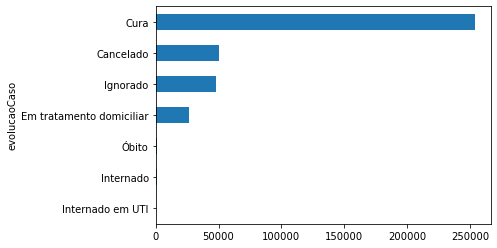

In [7]:
df.groupby('evolucaoCaso').size().sort_values().plot(kind='barh')

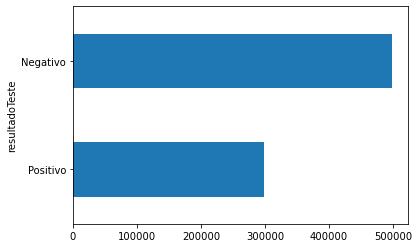

In [8]:
df.groupby('resultadoTeste').size().sort_values().plot(kind='barh')

In [9]:
positivos = pd.Series(pos.groupby('idade').size(),name = "Positivos")
cura = pd.Series(curados.groupby('idade').size(), name = "Curados")
obito = pd.Series(obitos.groupby('idade').size(), name = "Óbitos")

heal = pd.merge(positivos, cura, on='idade')

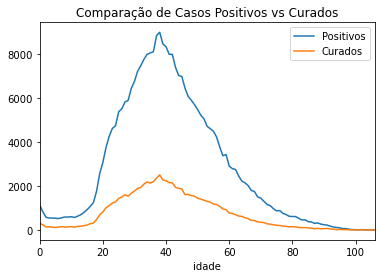

In [10]:
heal.plot(xlim =(0,106), title="Comparação de Casos Positivos vs Curados")

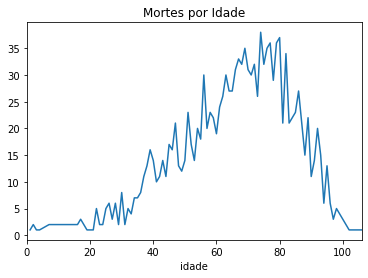

In [11]:
obito.plot(xlim= (0,106), title="Mortes por Idade")

Text(0.5, 1.0, 'Porcentagem de Mortes por Idade')

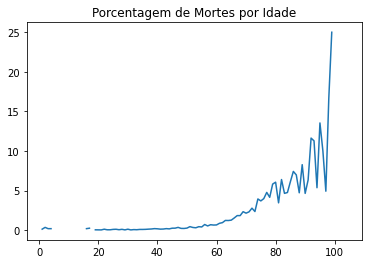

In [12]:
pm = []
for i in range(106):
    try: 
        pm.append(obito[i]*100/positivos[i])
    except: 
        pm.append(None)

mpl.pyplot.plot(pm)
mpl.pyplot.title("Porcentagem de Mortes por Idade")